In [1]:
import pandas as pd

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
labels = pd.DataFrame(iris.target)
##### target label(correct label)

In [5]:
labels.columns = ['labels']
##### column name : labels

In [6]:
labels.head()

,labels
0,0
1,0
2,0
3,0
4,0


In [7]:
data = pd.DataFrame(iris.data)

In [8]:
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
data.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

In [10]:
data = pd.concat([data, labels], axis=1)
# concatenate function to join labels into data , axis=1 means 'column', axis =0 means 'row'

In [11]:
data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
feature = data[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']]
# train data

In [13]:
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
model = DBSCAN(min_samples=6)
##### min_samples means the number of minimun points 

In [16]:
model

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=6, n_jobs=None, p=None)

In [17]:
predict = pd.DataFrame(model.fit_predict(feature))

In [31]:
predict.columns=['predict']

In [32]:
predict.head()

,predict
0,0
1,0
2,0
3,0
4,0


In [33]:
r = pd.concat([feature, predict], axis=1)
###### concatenate predicted labels into feature

In [34]:
r.tail()

,Sepal length,Sepal width,Petal length,Petal width,predict
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,1


In [35]:
from mpl_toolkits.mplot3d import Axes3D
##### 3D graph visualization(scatter plot)

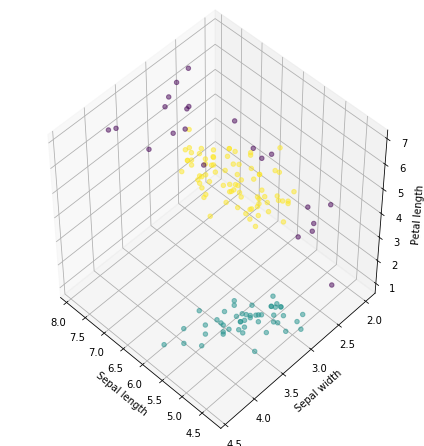

In [36]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect=[0,0,.95, 1], elev=48, azim=134)
ax.scatter(r['Sepal length'], r['Sepal width'], r['Petal length'], c=r['predict'], alpha=0.5)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

In [49]:
ct = pd.crosstab(data['labels'], r['predict'])
## margins = True  (Default = False)

In [50]:
ct

predict,-1,0,1,2,3
labels,,,,,
0,7,43,0,0,0
1,13,0,31,6,0
2,22,0,10,0,18


In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
model = DBSCAN(min_samples=6)
pipeline = make_pipeline(scaler,model)
predict = pd.DataFrame(pipeline.fit_predict(feature))
predict.columns=['predict']


In [54]:
pipeline

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('dbscan', DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=6, n_jobs=None, p=None))])

In [52]:
r = pd.concat([feature,predict],axis=1)
ct = pd.crosstab(data['labels'],r['predict'])

In [53]:
ct

predict,-1,0,1,2,3
labels,,,,,
0,7,43,0,0,0
1,13,0,31,6,0
2,22,0,10,0,18
